<a href="https://colab.research.google.com/github/datahouse-consults/malawi/blob/main/Homogeneous_models_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homogeneous Epidemic Modeling
In this section we will learn to code basic compartmental models. Here we will use python, however there will be psuedocode attached to each exercise that you can translate into your language of choice.  

**This is a template notebook that I will edit in class, please copy this notebook so that you can make your own edits**

If you are already a python user you can download this jupyter notebook and open it locally.

If you are not a python user you do not need to download anything, just copy this notebook:
1. Go to *File* above
2. Click *Save a copy in Drive*

A new tab/webpage with a copy of this notebook should open.

**How to use this notebook** (if you have never used python before)

- To run cells in this notebook press *shift enter* OR the play button on the left side of the cell
- To add new cells click on *+ Code* above

In [ ]:
#These are just random packages you might need
import numpy as np
from matplotlib import pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

<ipython-input-1-56dfb4f9b96b>:6: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)


## Exercise 1: Coding the deterministic SIR model

**Goal:** Create a function where the inputs are the SIR model parameters and the output is a time series of the number of people in each of the S/I/R compartments using the *deterministic* SIR model

***Psuedocode***
1. Set disease parameters (beta, mu)
2. Set initial conditions (Population size, Initial number of seeds)
3. Define variables S, I, R
4. For each timestep *t*
  * Calculate the force of infection: beta*I(t)/N
  * Calculate the number of new infectious and recovered
  * Update the S, I, R count for t+1








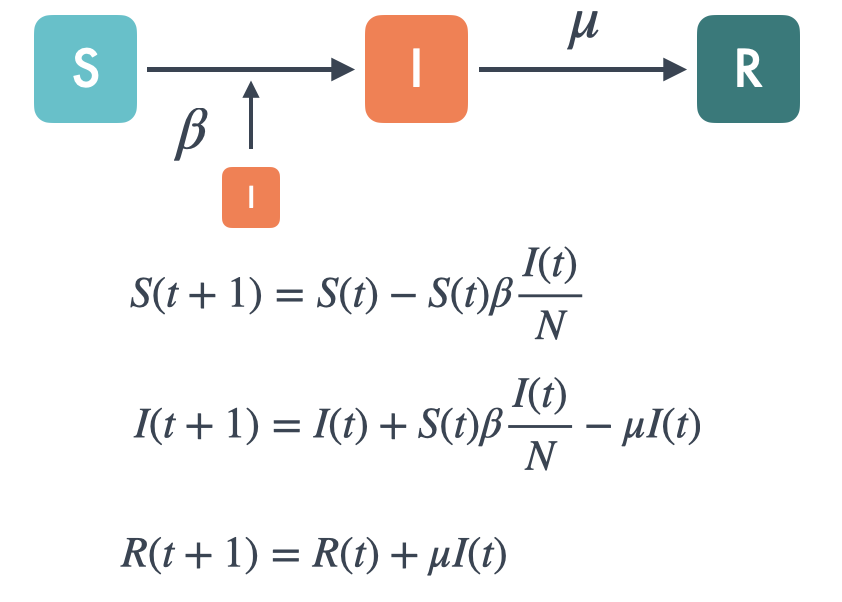

In [ ]:


def SIR_deterministic(N,beta,mu,I0,T_max):
    """
    beta: transmissibility
    N: total population (fixed)
    I0: Number of Initial Infectious
    mu: recovery probability
    T_max: total number of time steps
    """

    #Step 1: Set up
    ##set up containers to store the number of people in each S,I,R compartment
    S = np.zeros(T_max) #makes an array of zeros of length T_max
    S[0] = N-I0 #set initial conditions (fully susceptible population minus the initial infected)

    I = np.zeros(T_max)
    I[0] = I0 #set initial conditions

    R = np.zeros(T_max)

    #Step 2: Iterate
    t = 0
    for t in range(T_max-1): #iterates through values from 0 to T_max-2

        #calculate the force of infection
        force_inf = beta*I[t]/N

        #get new infectious
        new_infectious = S[t]*force_inf
        new_recovered = I[t]*mu

        #update lists
        S[t+1] = S[t]-new_infectious
        I[t+1] = I[t]+ new_infectious-new_recovered
        R[t+1] = R[t]+ new_recovered

    return S,I,R

### Run the model for one set of parameters

In [ ]:
beta = 0.5 #transmissibility
mu = 1/3 #3 day infectious period (average)
N = 10000 # population size
seeds= 50 # number of initially infected individuals
tmax = 200 #total number of time steps simulated

print("The R0 is",beta/mu)

St,It,Rt = SIR_deterministic(N,beta,mu,seeds,tmax)

The R0 is 1.5


**Plot the results**

Text(0, 0.5, 'Number of Recovered')

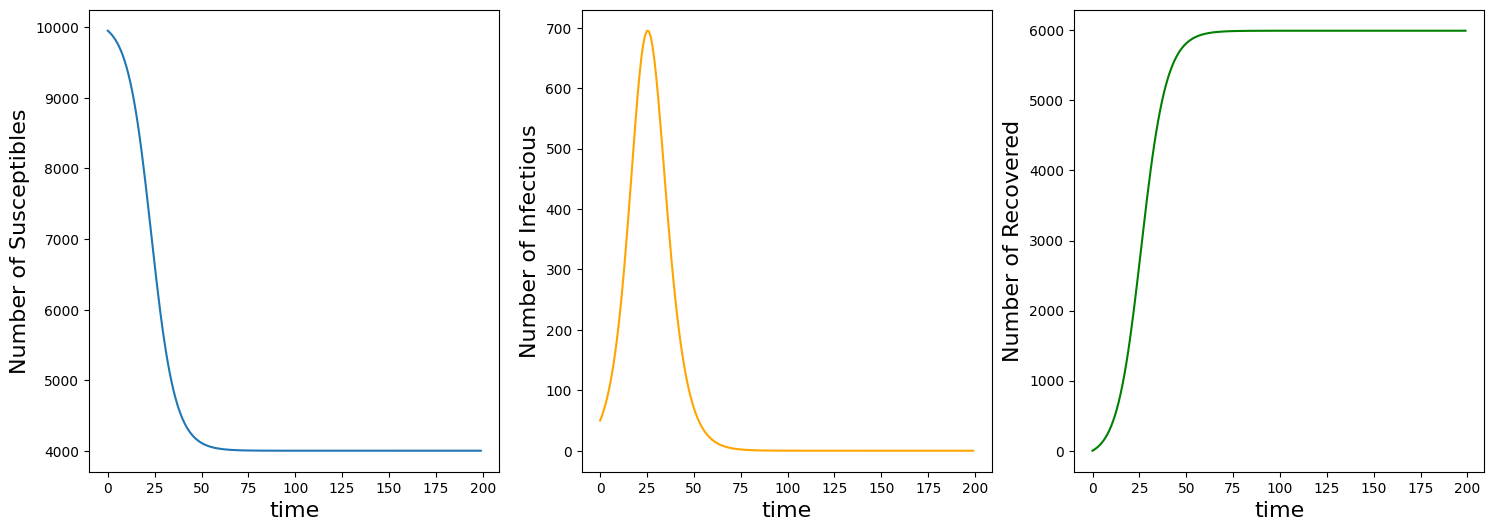

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(St,label = 'S')
plt.xlabel('time',fontsize = 16)
plt.ylabel('Number of Susceptibles',fontsize = 16)


plt.subplot(1,3,2)
plt.plot(It,label = 'I',color='orange')
plt.xlabel('time',fontsize = 16)
plt.ylabel('Number of Infectious',fontsize = 16)

plt.subplot(1,3,3)
plt.plot(Rt,label = 'R',color = 'g')
plt.xlabel('time',fontsize = 16)
plt.ylabel('Number of Recovered',fontsize = 16)



**What if we explore different values of R0**?

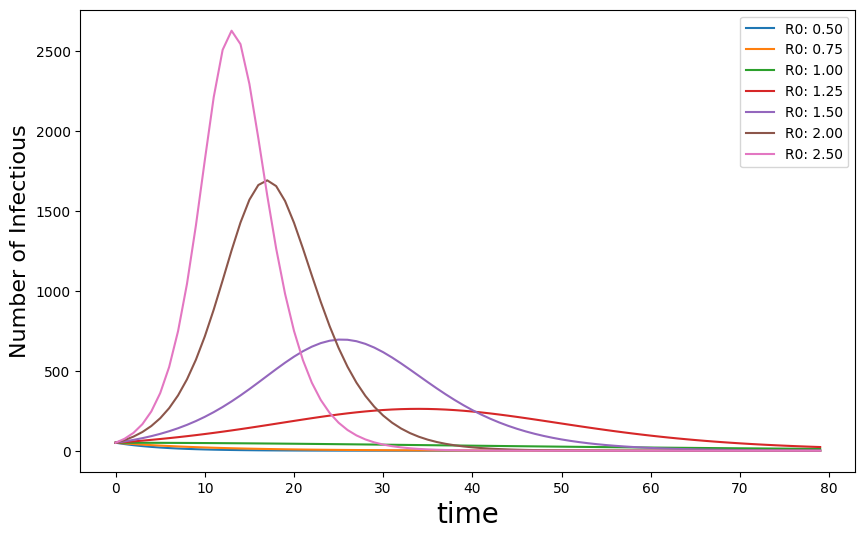

In [ ]:
#set parameters
mu = 1/3
N = 10000
seeds= 50
tmax = 80

plt.figure(figsize=(10,6))

for R0 in [0.5,0.75,1,1.25,1.5,2,2.5]:

    beta = R0*mu
    St,It,Rt = SIR_deterministic(N,beta,mu,seeds,tmax)

    plt.plot(range(tmax),It,label = "R0: %1.2f" % R0)

plt.xlabel(r"time",fontsize = 20)
plt.ylabel('Number of Infectious',fontsize = 16)
plt.legend()


**What about different infectious periods?**

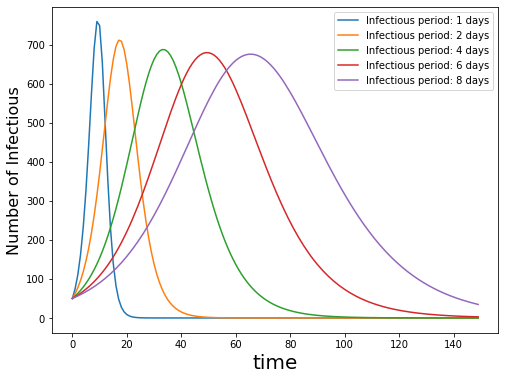

In [ ]:
R0 = 1.5
N = 10000
seeds= 50
tmax = 150

plt.figure(figsize=(8,6))

for infectious_period in [1,2,4,6,8]:
    mu = 1/infectious_period
    beta = R0*mu
    St,It,Rt = SIR_deterministic(N,beta,mu,seeds,tmax)

    plt.plot(range(tmax),It,label = "Infectious period: %i days" % infectious_period)

    plt.xlabel(r"time",fontsize = 20)
    plt.ylabel('Number of Infectious',fontsize = 16)
    plt.legend()


### Recovering the Epidemic Threshold

In [ ]:
R0_list = np.linspace(0,4,num = 50)
#print(R0_list)

Goal: create a data structure to store the the simulation results for each R0 value

In [ ]:
R0_data = dict() #this dictionary stores the lists of St, It, and Rt for each value of R0 we want to explore
                 # key: R0, value: list of St, It, Rt

mu = 1/3
N = 10000
seeds= 50
tmax = 200

for R0 in R0_list:
    beta = R0*mu
    St,It,Rt = SIR_deterministic(N,beta,mu,seeds,tmax)
    R0_data[R0] = [St,It,Rt]


Plot

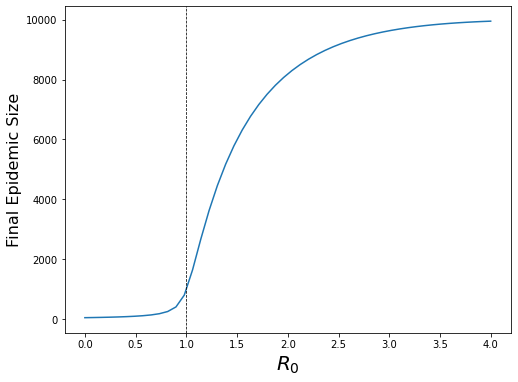

In [ ]:
R0s = []
final_epidemic_size = []
for R0, (st,it,rt) in R0_data.items():
  R0s.append(R0)
  final_epidemic_size.append(rt[-1])

plt.figure(figsize=(8,6))

plt.plot(R0s, final_epidemic_size)
plt.xlabel(r"$R_0$",fontsize = 20)
plt.ylabel('Final Epidemic Size',fontsize = 16)

plt.axvline(1,color = "k", linestyle = "--", linewidth = 0.75 )


## Exercise 2: Coding the stochastic SIR model

In [ ]:
def SIR_stochastic(N,beta,mu,I0,T_max):
    """
    beta: transmissibility
    N: total population (fixed)
    I0: Number of Initial Infectious
    mu: recovery probability

    T_max: total number of time steps
    """
    #set up S,I,R
    S = np.zeros(T_max)
    S[0] = N-I0

    I = np.zeros(T_max)
    I[0] = I0

    R = np.zeros(T_max)

    t = 0
    for t in range(T_max-1):

        force_inf = 1-(1-beta/N)**I[t]

        #get new infectious
        new_infectious = np.random.binomial(S[t],force_inf)
        new_recovered = np.random.binomial(I[t],mu)

        #update lists
        S[t+1] = S[t]-new_infectious
        I[t+1] = I[t]+ new_infectious-new_recovered
        R[t+1] = R[t]+ new_recovered

    return S,I,R

## Single Simulation

In [ ]:
beta = 0.13
mu = 0.1
N = 10000
seeds= 50
tmax = 500
St,It,Rt = SIR_stochastic(N,beta, mu, seeds, tmax)

### Time Evolution Plots

Text(0, 0.5, 'Number of Recovered')

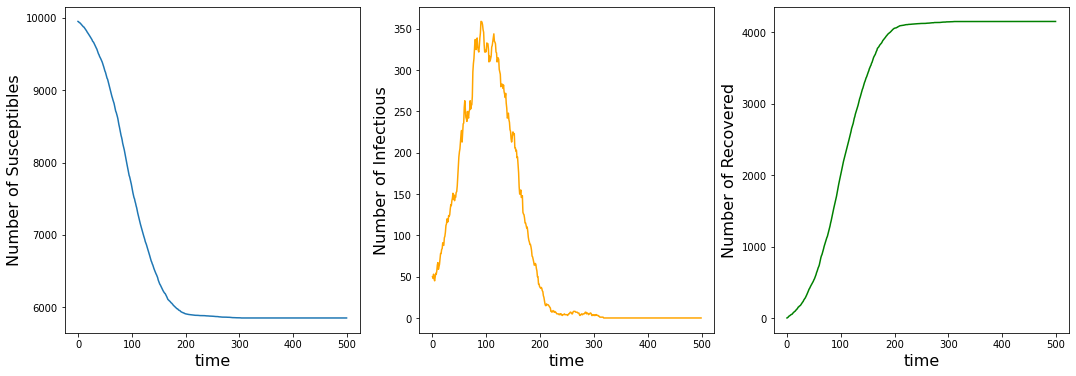

In [ ]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(St,label = 'S')
plt.xlabel('time',fontsize = 16)
plt.ylabel('Number of Susceptibles',fontsize = 16)


plt.subplot(1,3,2)
plt.plot(It,label = 'I',color='orange')
plt.xlabel('time',fontsize = 16)
plt.ylabel('Number of Infectious',fontsize = 16)

plt.subplot(1,3,3)
plt.plot(Rt,label = 'R',color = 'g')
plt.xlabel('time',fontsize = 16)
plt.ylabel('Number of Recovered',fontsize = 16)

### Multiple Simulations

In [ ]:
Ss = []
Is = []
Rs = []

iterations = 10
beta = .45
mu = 0.3
N = 10000
seeds= 10
tmax = 100
for _ in range(iterations):



    St,It,Rt = SIR_stochastic(N,beta, mu, seeds,tmax)

    Ss.append(St)
    Is.append(It)
    Rs.append(Rt)

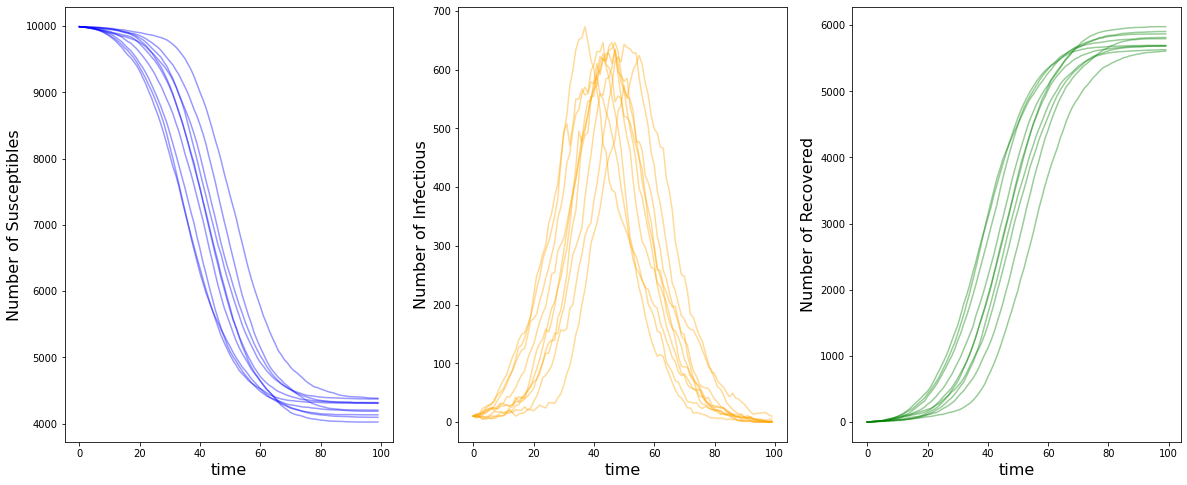

In [ ]:
plt.figure(figsize=(20,8))


for i in range(len(Ss)):

    plt.subplot(1,3,1)
    plt.plot(Ss[i],label = 'S',color = 'blue',alpha= 0.4)
    plt.xlabel('time',fontsize = 16)
    plt.ylabel('Number of Susceptibles',fontsize = 16)


    plt.subplot(1,3,2)
    plt.plot(Is[i],label = 'I',color='orange',alpha= 0.4)
    plt.xlabel('time',fontsize = 16)
    plt.ylabel('Number of Infectious',fontsize = 16)

    plt.subplot(1,3,3)
    plt.plot(Rs[i],label = 'R',color = 'g',alpha= 0.4)
    plt.xlabel('time',fontsize = 16)
    plt.ylabel('Number of Recovered',fontsize = 16)

### Do all stochastic epidemics take off?

In [ ]:
Ss = []
Is = []
Rs = []
iterations = 1000


beta = 0.13
mu = 0.1
N = 10000
seeds= 10
tmax = 800
print("My R0 is:", beta/mu)

for _ in range(iterations):



    St,It,Rt = SIR_stochastic(N,beta, mu, seeds,500)

    Ss.append(St)
    Is.append(It)
    Rs.append(Rt)

My R0 is: 1.3


In [ ]:
final_sizes = [r[-1] for r in Rs]

Text(0.5, 1.0, 'beta = 0.13')

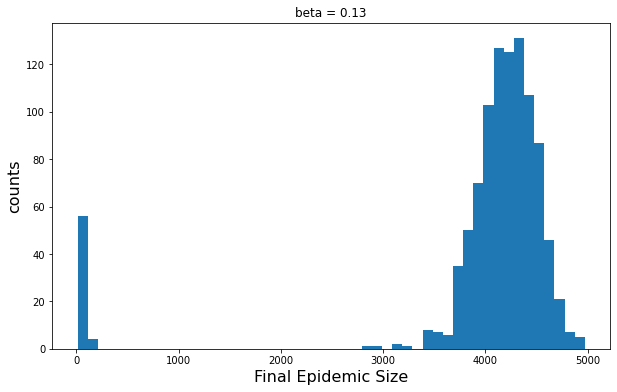

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(final_sizes,bins=50)
plt.xlabel('Final Epidemic Size',fontsize=16)
plt.ylabel('counts',fontsize=16)
plt.title('beta = %1.2f' % beta)

## Challenge 1: Endemic models

Goal: Create a function similar to the SIR model from Exercise 1 for an SIS model seen below

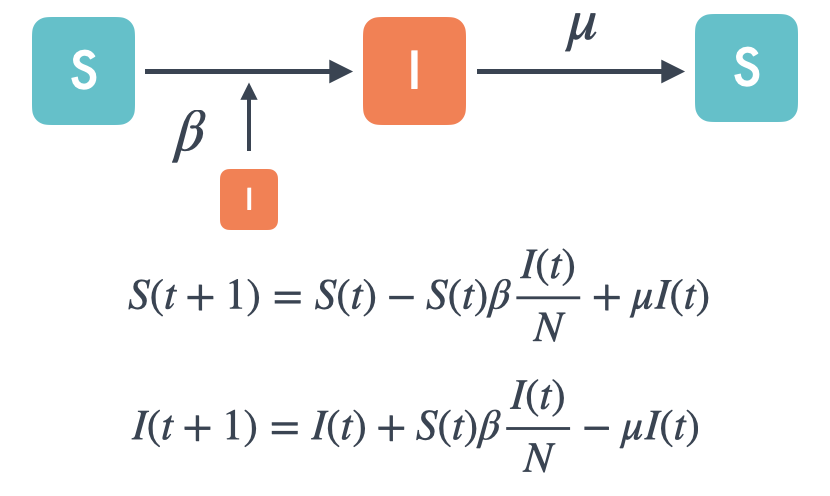

SIS Model

In [ ]:
def SIS_deterministic(N,beta,mu,I0,T_max):
  """
  beta: transmissibility
  N: total population (fixed)
  I0: Number of Initial Infectious
  mu: recovery probability
  T_max: total number of time steps
  """

  #Step 1: Set up
  ##set up containers to store the number of people in each S,I,R compartment
  S = np.zeros(T_max)
  S[0] = N-I0 #set initial conditions (fully susceptible population minus the initial infected)

  I = np.zeros(T_max)
  I[0] = I0 #set initial conditions

  #Step 2: Iterate
  t = 0
  for t in range(T_max-1):

      #calculate the force of infection
        force_inf = beta*I[t]/N

        #get new infectious
        new_infectious = S[t]*force_inf
        new_recovered = I[t]*mu

        #update lists
        S[t+1] = S[t]-new_infectious +new_recovered
        I[t+1] = I[t]+ new_infectious-new_recovered

  return S,I



Plot the results

(0.0, 11000.0)

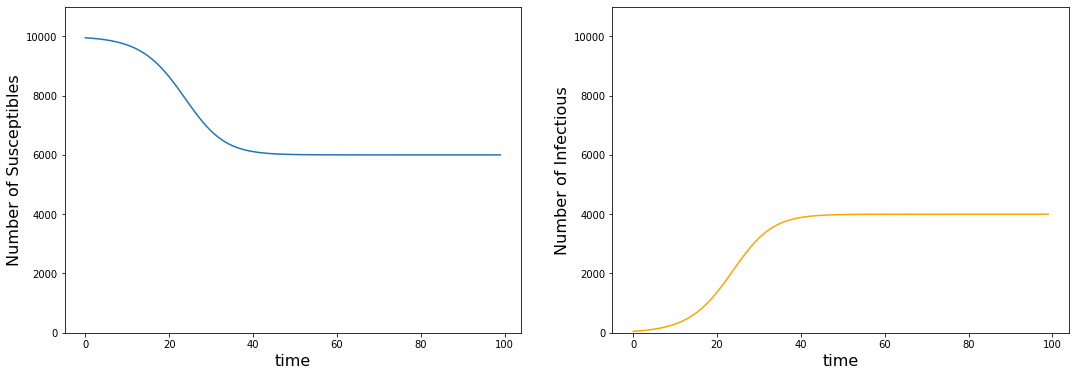

In [ ]:
beta = 0.5
mu = 0.3
N = 10000
seeds= 50
tmax = 100
St,It = SIS_deterministic(N,beta, mu, seeds, tmax)

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(St,label = 'S')
plt.xlabel('time',fontsize = 16)
plt.ylabel('Number of Susceptibles',fontsize = 16)
plt.ylim(0,11000)

plt.subplot(1,2,2)
plt.plot(It,label = 'I',color='orange')
plt.xlabel('time',fontsize = 16)
plt.ylabel('Number of Infectious',fontsize = 16)
plt.ylim(0,11000)




Scan different R0 values. Is the epidemic threshold of the SIS model different than the SIR model?

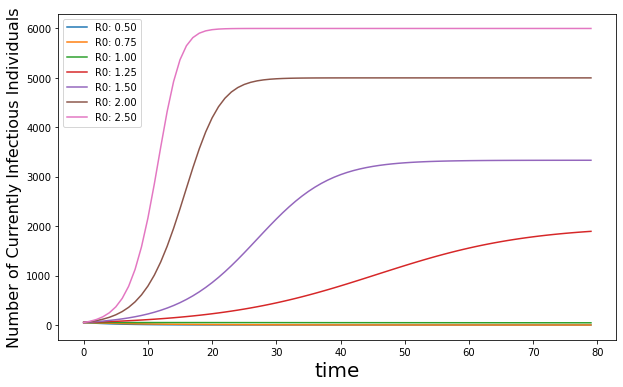

In [ ]:
mu = 1/3
N = 10000
seeds= 50
tmax = 80

plt.figure(figsize=(10,6))

for R0 in [0.5,0.75,1,1.25,1.5,2,2.5]:

    beta = R0*mu
    St,It = SIS_deterministic(N,beta,mu,seeds,tmax)

    plt.plot(range(tmax),It,label = "R0: %1.2f" % R0)

plt.xlabel(r"time",fontsize = 20)
plt.ylabel('Number of Currently Infectious Individuals',fontsize = 16)
plt.legend()


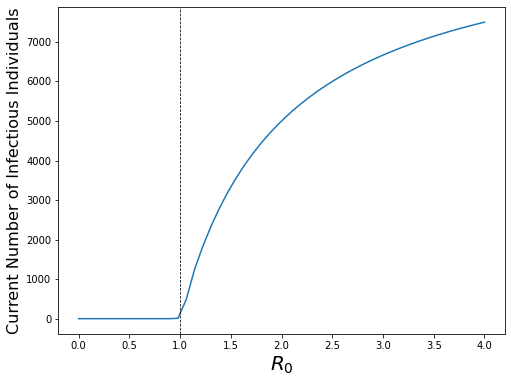

In [ ]:
R0_list = np.linspace(0,4,num = 50)
#print(R0_list)

R0_data = dict() #this dictionary stores the lists of St, It, and Rt for each value of R0 we want to explore
                 # key: R0, value: list of St, It, Rt

mu = 1/3
N = 10000
seeds= 50
tmax = 200

for R0 in R0_list:
    beta = R0*mu
    St,It = SIS_deterministic(N,beta,mu,seeds,tmax)
    R0_data[R0] = [St,It]


R0s = []
current_infectious = []
for R0, (st,it) in R0_data.items():
  R0s.append(R0)
  current_infectious.append(it[-1])

plt.figure(figsize=(8,6))

plt.plot(R0s, current_infectious)
plt.xlabel(r"$R_0$",fontsize = 20)
plt.ylabel('Current Number of Infectious Individuals',fontsize = 16)

plt.axvline(1,color = "k", linestyle = "--", linewidth = 0.75 )


## Challenge #2

In response to emerging epidemics interventions can be implemented to reduce the burden of a disease and additionally people can change their behavior (ex: work from home, wear a mask).

So in this exercise, the goal is to play around with how we can incorporate these interventions into our mechanistic model.

Step 1: Code this compartmental model
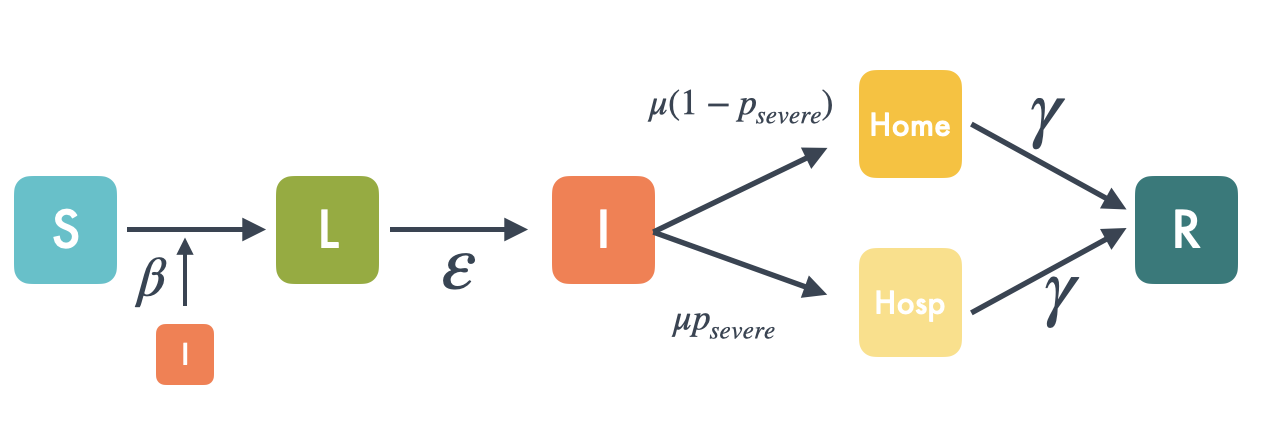

In this model, once individuals are infected they move into a latent phase that lasts for 4 days (1/epsilon). They then progress into the infectious period which lasts for 3 days. Afterwards, that some individuals may develop severe symptoms which requires them to be hospitalized (this happens with a probability of 0.3). If they do not develop a severe illness they can recover at home. When individuals are hosptialized or at home they can not infect anyone else. Hospitalization/Home recovery take approximately 7 days (1/gamma).

You live in a town of 100K people and initially 10 people have been found to be infectious

Step 1: Write out the set of equations you can use to model this dynamic and then code them up

In [ ]:


def challenge_deterministic(N,beta,mu,eps,p_severe,gamma,I0,T_max):

    #Step 1: Set up
    ##set up containers to store the number of people in each S,I,R compartment
    S = np.zeros(T_max)
    S[0] = N-I0 #set initial conditions (fully susceptible population minus the initial infected)

    L = np.zeros(T_max)

    I = np.zeros(T_max)
    I[0] = I0 #set initial conditions

    Home = np.zeros(T_max)
    Hosp = np.zeros(T_max)


    R = np.zeros(T_max)

    #Step 2: Iterate
    t = 0
    for t in range(T_max-1):

        #calculate the force of infection
        force_inf = beta*I[t]/N


        #get new infectious
        new_latent = S[t]*force_inf
        new_infectious = L[t]*eps
        new_home = I[t]*mu*(1-p_severe)
        new_hosp = I[t]*mu*p_severe
        new_recovered_home = Home[t]*gamma
        new_recovered_hosp = Hosp[t]*gamma

        #update lists
        S[t+1] = S[t]-new_latent
        L[t+1] = L[t]+new_latent-new_infectious
        I[t+1] = I[t]+ new_infectious-new_home-new_hosp
        Home[t+1] = Home[t]+new_home-new_recovered_home
        Hosp[t+1] = Hosp[t]+new_hosp-new_recovered_hosp


        R[t+1] = R[t]+new_recovered_home+new_recovered_hosp

    return S,L,I,Home,Hosp,R

If R0 is estimated to be 2.0 for this disease, how many hospital beds does your town need if the epidemic plays out and there are no interventions?

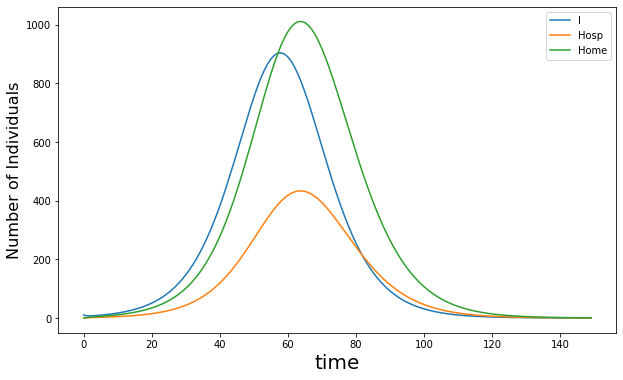

In [ ]:
mu = 1/4
N = 10000
seeds= 50
tmax = 150
R0 = 2
beta = R0*mu
eps = 1/3
p_severe = 0.3
gamma = 1/7
I0= 10

total_infection_frac = 0.05

plt.figure(figsize=(10,6))


S,L,I,Home,Hosp,R= challenge_deterministic(N,beta,mu,eps,p_severe,gamma,I0,tmax)

plt.plot(range(tmax),I, label  = "I")
plt.plot(range(tmax),Hosp, label  = "Hosp")
plt.plot(range(tmax),Home, label  = "Home")


plt.xlabel(r"time",fontsize = 20)
plt.ylabel('Number of Individuals',fontsize = 16)
plt.legend()


In [ ]:
print("The number of hospital beds needed is: ", max(Hosp))

The number of hospital beds needed is:  433.4070741642827


The hospital in your town only has 200 beds, so your results suggest that the epidemic might push the hospital's capacity.

To get ahead of this, the town decided that when the hospital is at 60% capacity, there is a mandatory mask mandate that is sustained until the end of the outbreak. We know from previous studies that given the amount of compliance with the mandate and the overall effectiveness of the masks, this reduces the possibility of transmission by 50% +/10%. Is this enough?

In [ ]:


def challenge_deterministic_intervention(N,beta,mu,eps,p_severe,gamma,I0,T_max, capacity,reduction):

    #Step 1: Set up
    ##set up containers to store the number of people in each S,I,R compartment
    S = np.zeros(T_max)
    S[0] = N-I0 #set initial conditions (fully susceptible population minus the initial infected)

    L = np.zeros(T_max)

    I = np.zeros(T_max)
    I[0] = I0 #set initial conditions

    Home = np.zeros(T_max)
    Hosp = np.zeros(T_max)


    R = np.zeros(T_max)
    capacity_met = False
    #Step 2: Iterate
    t = 0
    for t in range(T_max-1):

        #calculate the force of infection
        force_inf = beta*I[t]/N

        if capacity_met==False and capacity<= Hosp[t]:
          force_inf = force_inf*reduction
          capacity_met = True
        elif capacity_met ==True:
          force_inf = force_inf*reduction


        #get new infectious
        new_latent = S[t]*force_inf
        new_infectious = L[t]*eps
        new_home = I[t]*mu*(1-p_severe)
        new_hosp = I[t]*mu*p_severe
        new_recovered_home = Home[t]*gamma
        new_recovered_hosp = Hosp[t]*gamma

        #update lists
        S[t+1] = S[t]-new_latent
        L[t+1] = L[t]+new_latent-new_infectious
        I[t+1] = I[t]+ new_infectious-new_home-new_hosp
        Home[t+1] = Home[t]+new_home-new_recovered_home
        Hosp[t+1] = Hosp[t]+new_hosp-new_recovered_hosp


        R[t+1] = R[t]+new_recovered_home+new_recovered_hosp

    return S,L,I,Home,Hosp,R

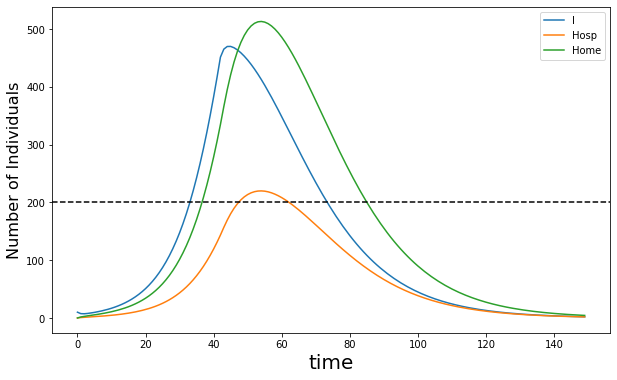

In [ ]:
mu = 1/4
N = 10000
seeds= 50
tmax = 150
R0 = 2
beta = R0*mu
eps = 1/3
p_severe = 0.3
gamma = 1/7
I0= 10
capacity = 200
capacity_time = capacity * 0.6
reduction = 1-0.50 # this is actually the reduction multiplier




plt.figure(figsize=(10,6))


S,L,I,Home,Hosp,R= challenge_deterministic_intervention(N,beta,mu,eps,p_severe,gamma,I0,tmax,capacity_time,reduction)

plt.plot(range(tmax),I, label  = "I")
plt.plot(range(tmax),Hosp, label  = "Hosp")
plt.plot(range(tmax),Home, label  = "Home")


plt.xlabel(r"time",fontsize = 20)
plt.ylabel('Number of Individuals',fontsize = 16)
plt.legend()
plt.axhline(capacity, linestyle = "--", color = "k")